In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from __future__ import division
from IPython.display import Image

%matplotlib inline

In [2]:
%%html

<!-- Want all my tables to be left aligned -->

<style>
    table {float:left}
</style>

# Introduction 

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. 

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

# Purpose 
 
We are going to examine the [Titanic disaster](https://www.kaggle.com/c/titanic) dataset found on Kaggle. This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.


Firstly, we will take a look at the data, and then decide which questions we want to answer from the dataset. Nonetheless, we will clean and modify the data, and remove unwanted columns if they are not necessary for our analysis.

# Read data

In [75]:
# Read the data and take a quick look at it
df = pd.read_csv(os.path.join('data', 'titanic_data.csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### VARIABLE DESCRIPTIONS:
(from [Kaggle](https://www.kaggle.com/c/titanic/data))

- **survival** (0 = No; 1 = Yes)
- **pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- **name**
- **sex**
- **age**
- **sibsp**: Number of Siblings/Spouses Aboard
- **parch**: Number of Parents/Children Aboard
- **ticket**: Ticket Number
- **fare**
- **cabin**
- **embarked**: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children traveled
only with a nanny, therefore parch=0 for them.  As well, some
traveled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

# Data wrangling part

### Unnecessary columns
Immediately, we have some columns which we would like to remove, as we believe they will not influence our analysis. From the table above these are identified as:

- PassengerId
- Name: ***The title might be important, but we will not look into that now.***
- Ticket
- Cabin: Is related to the class and ticket fare.

The reason for the selection, is that they are string-like and used as identification in the table.

In [76]:
# Dropping the variables
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [77]:
# Size of the matrix
df.shape

(891, 8)

Now, let us look at what data types are present in the data frame, and if we are missing any data 

In [78]:
# Data types
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

All columns, except from Sex and Embarked are numerical, i.e. integers and floats. 

In [79]:
# Check why Embarked and Sex are objects
print df['Sex'].unique()
print df['Embarked'].unique()

['male' 'female']
['S' 'C' 'Q' nan]


Seems as object in pandas means string. From [pandas doc](http://pandas.pydata.org/pandas-docs/stable/basics.html) we have:

 >**Note** When working with heterogeneous data, the dtype of the resulting ndarray will be chosen to accommodate all of the data involved. For example, if strings are involved, the result will be of object dtype.
 
So, when strings are found in a pandas series, the series will be of dtype=object. Nice to know :)!
 
 
Nevertheless, we see missing values (NaN)! We will look at this in the following cells.

In [80]:
# Finding number of missing values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

177 Age and 2 Embarked entries are missing. For this project, we will simply drop the rows containing these missing values.

In [81]:
# Remove the NaN-values
df.dropna(inplace=True)

# Reset the index and remove the old one
df.reset_index(inplace=True, drop=True)

# We will now have less values as the rows with NaN are removed.
df.shape

(712, 8)

712 rows of passenger information is good for our purpose. Now let us take a look at the correlation matrix and pairplot to see if we can get a good notion on which variables are governing passenger survival. 

In [82]:
# Look at the correlation matrix to see how the different features realate to each other
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


Correlation can take the value between (-1, 1) and demonstrates a linear relationship between two variables. However, it is always useful to plot the data. One may be tricked by a relatively good correlation, even though the data is non-linear.

Let us just look at the correlation between the **Survived** cell and sort the absolute values (just to see which variables have the greatest absolute correlation).

In [83]:
# Sort the absolute values
corr_matrix['Survived'].map(np.abs).sort_values(ascending=False)

Survived    1.000000
Pclass      0.356462
Fare        0.266100
Parch       0.095265
Age         0.082446
SibSp       0.015523
Name: Survived, dtype: float64

Ok, so we see that two parameters have a relative high correlation with **Survived** compared to the others, Pclass and Fare. Maybe this is an indicator that they have a strong influence on survival?

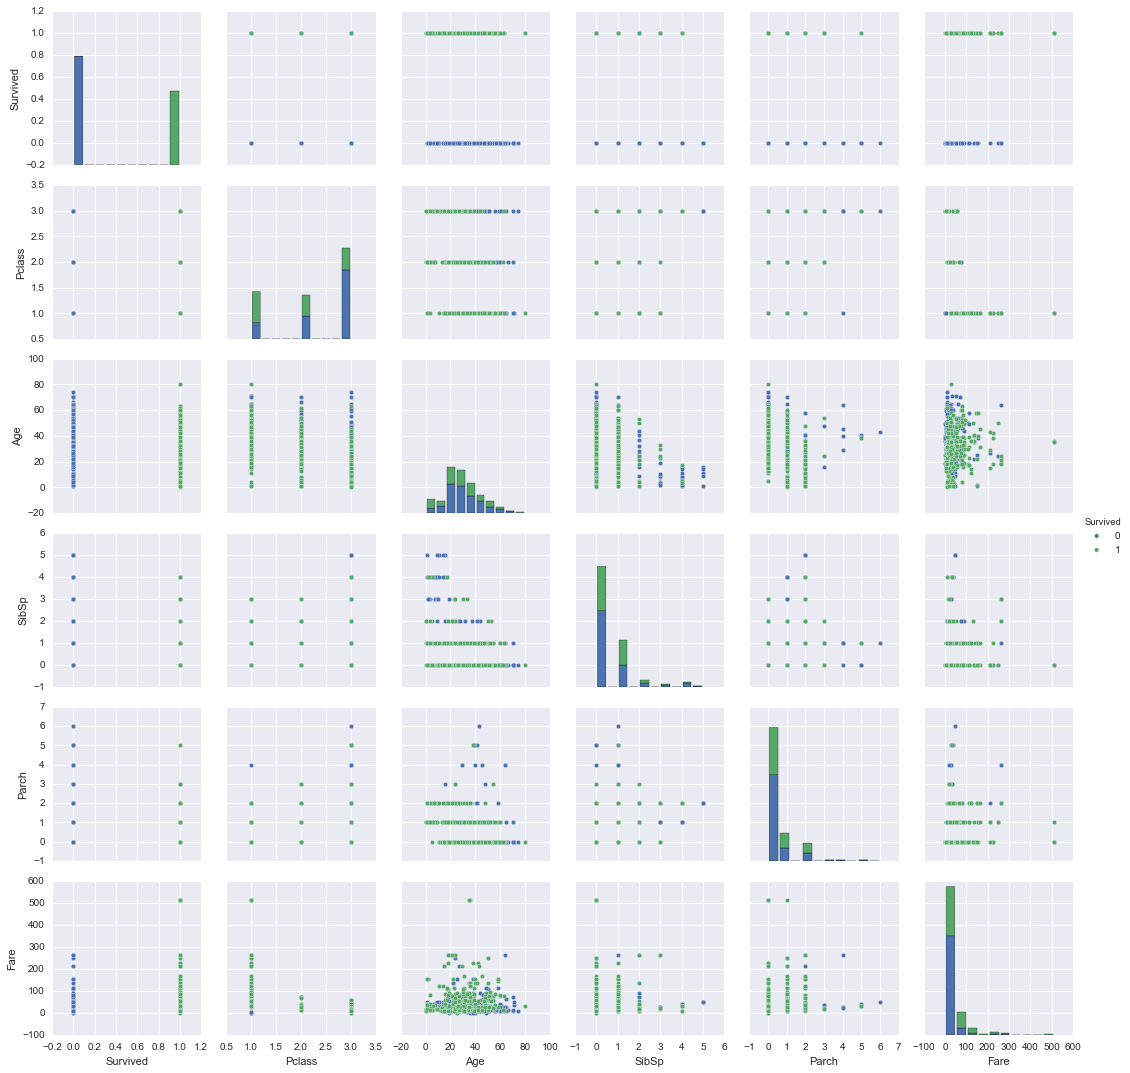

In [12]:
# Let's take a quick look at the data to get some notion about it
sns.pairplot(data=df, hue='Survived') 

The pairplot illustrates some interesting findings (remember that we removed all rows contacting NaN-values). Also, we see that there is no good linear relationship between the variables. Looking at the diagonal histograms, some interesting information we see is:

*Will indicate which chart I saw the information using (row, column) notion. (0,0) means the upper left chart.*

- Most of the people did not survive (0, 0).
- Similar amount of people at 1st and 2nd class. However, the majority of the people bought 3rd class tickets (1, 1).
- A slightly right-skewed age distribution (more adults). Most people with age around 20-40 (2, 2).
- Seems that most people between 60-80 years did not survive (0, 2).
- Mostly people without parents or children (3, 3) and (4, 4).
- Fare ticket under 50 was most common and a large portion of them died (5, 5).

Much more can be interpreted from the chart above, but we will not attempt that here.


Let us look at some statistics on the data:

In [84]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


From the table above we see some findings:

- Around 40% of the people survived the sinking. This is a bit away from the full dataset value: 1502 of 2224 died --> 32.5% survival rate. But it is good enough for us.
- Average age was around 30 years. The min value is the fraction of of one year. 0.42 means around 5 months, which is a baby.
- The maximum fare is quite huge, 512, while the min value indicates 0 fare. 

# Questions we want to answer

It is good to look at the data before making any question. We have done that and want to figure out who survived or not the Titanic sinking.

The question suggested by Udacity is something I myself thought of:
- Which factors govern the chance of survival? We will attempt using machine learning to find out which variables above influenced the passengers survival. We will look at this at the end of the notebook.

Before we attempt to utilize machine learning, we will try to find patters by analyzing the dataset using pandas and inferential statistics. Looking at the correlation matrix and pairplot, we have decided to take a closer look at these features and their influence on survival: 

1. **Pclass**: Did the socio-economic status have any effect on survival?
2. **Age**: How about age? Where certain age groups more likely to survive?
3. **Sex**: During the evacuation, where females preferred before men?
4. **Fare**: Ticket fare is connected to pclass. But, the fares were different within each pclass as well. Maybe this was even more important?

**Assumption: Assuming that survival was not by chance or luck.**

## Pclass

Let us look if we can find any inferences based on the passenger class

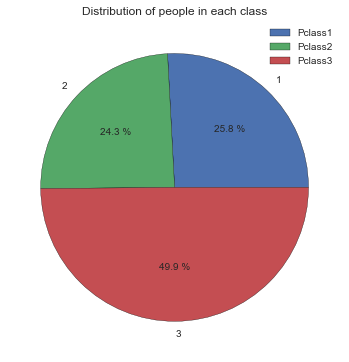

In [85]:
# Calculate the percentage of total people in each pclass
pclass_distribution = df.groupby('Pclass')['Survived'].count() / df.shape[0] * 100

# Plot the data
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
pclass_distribution.plot.pie(autopct='%.1f %%')
plt.title('Distribution of people in each class')
plt.ylabel('')
plt.legend(loc=0, labels=['Pclass1', 'Pclass2', 'Pclass3'])

Most of the passengers, around 50%, belonged to third class. The other half was evenly distributed between first and second class.

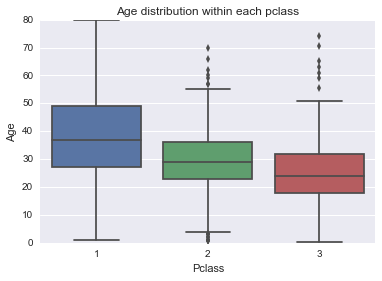

In [86]:
# Ages in the different classes
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age distribution within each pclass')

We see that for each pclass, the median age falls from 1st to 3rd class. Most rich people where in their 30-50 years, while the 3rd class passengers were mostly young people in their 20-30 years.

In [87]:
# Mean survival for all passangers
survival_mean = df['Survived'].mean()
survival_mean

0.4044943820224719

In [88]:
# Mean survival based on pclass
survival_class_means = df.groupby('Pclass')['Survived'].mean()
survival_class_means

Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64

Wow, here we see a great difference in the survival based on Pclass. Where the mean survival for our dataset is ~40%, when we look ath the pclasses, we se that pclass survival rate was:

1. class: ~65 % 
2. class: ~48 %
3. class: ~24 %

From the data it seems that we have a correlation between pclass and survival. Let us perform a statistical test to see if this is correct:

### Statistical test for Pclass vs Survival
We want to see if there is evidence that passenger class has an effect on the survival rate. After searching on the forum I found that a **chi square $\chi^2$ test of independence**  is a valid choice, see [here](https://discussions.udacity.com/t/titanic-dataset-which-test-for-survival-rate/163436). 

Information on performing the test is found [here](https://onlinecourses.science.psu.edu/stat200/node/73):

#### 1. Check any necessary assumptions and write null and alternative hypotheses.

**Assumptions**:
- We have categorical variables, Survived (1 or 0) and Pclass (1, 2 or 3).
- We are assuming that the people our dataset were randomly drawn from the entire dataset.
- Our expected values are at least five (5).
- Each individual is in one cell only in the contingency table.

**Our hypothesis**:

- $H_0$: Survival rate and pclass are independent, meaning that survival rate is around 40% for every pclass.
- $H_a$: Survival rate is dependent on pclass.
- $\alpha$-value: 0.05, giving us a critical $\chi^2_{crit} = 5.991$

#### 2. Contingency table

Creating the table using pandas crosstab. Found [here](http://hamelg.blogspot.no/2015/11/python-for-data-analysis-part-19_17.html):

In [89]:
# Find the number of people in each class that survived and did not
contingency_table = pd.crosstab(index=df['Survived'], columns=df['Pclass'], margins=True)

# Want to have these column and index names
colnames = ['Pclass1', 'Pclass2', 'Pclass3', 'Row totals']
rownames = ['Died', 'Survived', 'Col. totals']

# Assign to the contingency_table
contingency_table.columns = colnames
contingency_table.index = rownames

contingency_table

,Pclass1,Pclass2,Pclass3,Row totals
Died,64,90,270,424
Survived,120,83,85,288
Col. totals,184,173,355,712


#### Calculate the expected values

The calculated expected value using this formula:

$$E_{i, j} = \frac{\textrm{row total}_i \cdot \textrm{column total}_j }{n}$$

Tips on how to calculate the expected values was found [here](http://hamelg.blogspot.no/2015/11/python-for-data-analysis-part-25-chi.html).

In [90]:
# Calculating the outer product of: Row totals x Col.totals
expected  = np.outer(contingency_table['Row totals'][:-1], contingency_table.ix['Col. totals'][:-1]) / contingency_table.iloc[-1, -1]
# Creating a dataframe
expected  = pd.DataFrame(expected)

# Assign col. and row names as above
expected.columns = colnames[:-1]
expected.index = rownames[:-1]

expected

,Pclass1,Pclass2,Pclass3
Died,109.573034,103.022472,211.404494
Survived,74.426966,69.977528,143.595506


#### 2. Calculate the $\chi^2$ statistic
The $\chi^2$-statistic is computed using equation:

$$\chi^2 = \sum_{i=1}^{N} \frac{(O_i-E_i)^2}{E_i}$$

where:

- $O_i$ : The observed number of people survived in class $i$.
- $E_i$ : The excepted number of people survived in class $i$, when expecting a survival rate of 40.4%.

In [91]:
chi_square_statistic = ((contingency_table - expected)**2 / expected).sum().sum()
chi_square_statistic

91.0807454879102

#### Determine p-value

We have two rows and three columns of variables. This means that we have $(2-1) \cdot (3-1) = 2$ degrees of freedom. If we look at the [chi-square-table](http://sites.stat.psu.edu/~mga/401/tables/Chi-square-table.pdf), we find a p-value less than 0.005.

#### Calculation check using scipy.stats

In [92]:
# Check the chi-square using scipy
from scipy.stats import chisquare

# Create 1-D arrays of the expected and observed values
f_obs = [x for row in contingency_table.values[0:2, 0:3] for x in row]
f_exp = [x for row in expected.values for x in row]

# Perform the test
chi_statistic, pval = chisquare(f_obs, f_exp, ddof=2)

print chi_statistic
print pval

91.0807454879
1.28355016184e-19


We see that our scipy test gave same $\chi^2$-statisic of 91.08. The p-value is really small, 1.28E-19!

#### Conclusion

The p-value is less than our $\alpha$-level, meaning we can reject the null hypothesis. We have enough evidence showing that survival was dependent on passenger class.

## Age

We will take a look of the age distribution using a histogram and a boxplot.

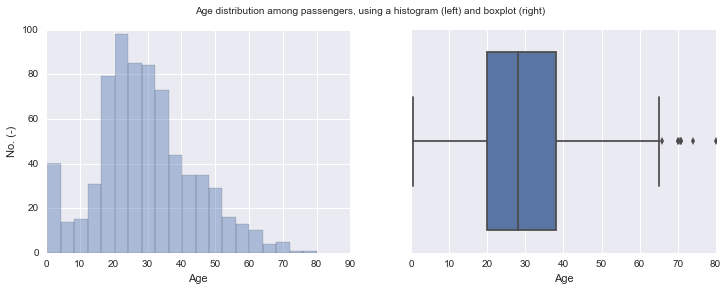

In [93]:
# Age distribution of all passangers
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# Plot of age dist.
sns.distplot(df['Age'], kde=False, ax=axs[0])
# Boxplot of age dist
sns.boxplot(x='Age', data=df, ax=axs[1])

# Ylabel for the histogram
axs[0].set_ylabel('No. (-)')

# One title for both plots
plt.suptitle('Age distribution among passengers, using a histogram (left) and boxplot (right)')

The plots above show us some interesting findings. Most of the people, belonging between the 25% - 75% quartiles, have an age of around 20-40 years. We see that there also are quite many children (below 5 years), while older people are less presents. Especially older than around 65 years, seen as the outliers in the box plot.

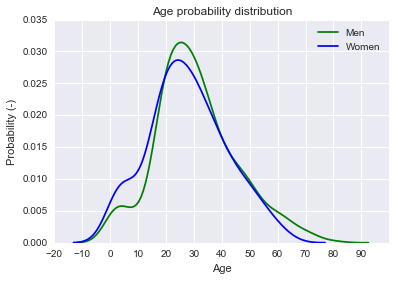

In [95]:
# Age distribution for each gender
sns.distplot(df[df['Sex'] == 'male']['Age'], kde=True, hist=False, color='g', label='Men')
sns.distplot(df[df['Sex'] == 'female']['Age'], kde=True, hist=False, color='b', label='Women')
plt.xticks(np.arange(-20, 100, 10))

# Labels
plt.title('Age probability distribution')
plt.ylabel('Probability (-)')

The gender age distributions are quite similar. However, we see three differences:

1. The men's distribution is more narrow. 
2. More children among women, than with men. I.e. age < 15.
3. Both have a mode around 25 years.
4. More elderly people among men, than among women.

In [24]:
# Men had actually three ages as mode.
df[df['Sex'] == 'male']['Age'].mode()

0    19.0
1    25.0
2    28.0
dtype: float64

In [25]:
# Women's mode
df[df['Sex'] == 'female']['Age'].mode()

0    24.0
dtype: float64

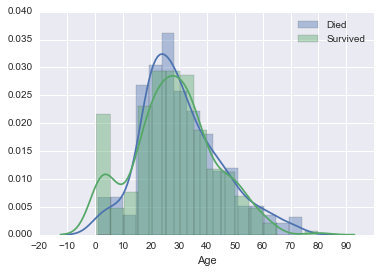

In [26]:
# Looking at the age distribution of people who survived and dies
age_died = df[df['Survived'] == 0]['Age']
age_survived = df[df['Survived'] == 1]['Age']

# Create a plot
sns.distplot(age_died, kde=True, hist=True, label='Died')
sns.distplot(age_survived, kde=True, hist=True, label='Survived')
plt.xticks(range(-20, 100, 10))
plt.legend(loc=0)

From the histograms above, we see that:
- Children were prioritized, giving a multi-modal distribution (two peaks).
- The distribution is more narrow for people who passed away.
- Most probable death age was around 25 years.

### Survival rates
In order to calculate the survival rates for the age, we will group them in ranges of **10 years**.

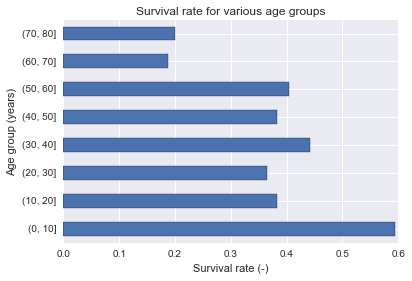

In [99]:
# Using pandas cut function to group the age
df['Binned_age'] = pd.cut(df.Age, bins=np.arange(0, 100, 10), right=True)
df.groupby('Binned_age')['Survived'].mean().dropna().plot.barh()
plt.xlabel('Survival rate (-)')
plt.ylabel('Age group (years)')
plt.title('Survival rate for various age groups')

After binning the ages and plotting the survival rates, three different of ages vs survival rates may be identified visually:

1. 60 - 80 years: Survival rate around 20%.
2. 10 - 60 years: Survival rate around 40%.
3.  0 - 10 years: Survival rate around 60%.

There seems to be a correlation between children below 10 years and an increased survival rate.

In [28]:
# Removed the binned ages
del df['Binned_age']

# Sex

Let us look at the survival based on gender data

In [29]:
# Number of man and women. Most where men:
gender_counts = df.Sex.value_counts()

# Calculate the percentage of the sexes
gender_counts / df.shape[0] * 100

male      63.623596
female    36.376404
Name: Sex, dtype: float64

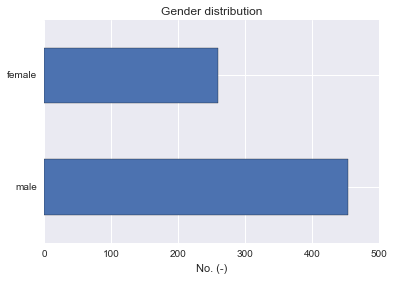

In [30]:
gender_counts.plot.barh()
plt.title('Gender distribution')
plt.xlabel('No. (-)')

Most of the passengers were men. 

In [31]:
df.groupby(['Sex', 'Survived']).count()['Pclass']

Sex     Survived
female  0            64
        1           195
male    0           360
        1            93
Name: Pclass, dtype: int64

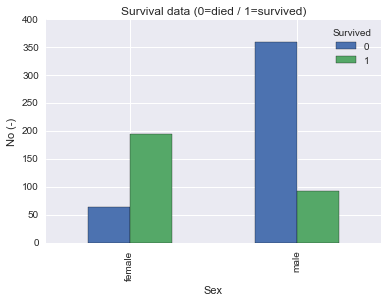

In [32]:
df.groupby(['Sex', 'Survived']).count()['Pclass'].unstack().plot.bar()
plt.title('Survival data (0=died / 1=survived)')
plt.ylabel('No (-)')

The bar plot shows that most of the women survived, while most of the men did not.

### Survival rates

Let us take a look on the survival rates between men and women, and also look how the different sexes managed in various pclasses also.

In [33]:
# Survival looking only on gender differences
df.groupby('Sex')['Survived'].mean()

Sex
female    0.752896
male      0.205298
Name: Survived, dtype: float64

From the table above, we a large difference in survival rates between genders. Overall, women had almost four times (~3.75) better chance to survive the sinking. 

In [69]:
# Pclass and gender combination
class_gender = df.groupby(['Pclass', 'Sex'])['Survived'].mean()
# Print the numerical values
class_gender

Pclass  Sex
1       0      0.963855
        1      0.396040
2       0      0.918919
        1      0.151515
3       0      0.460784
        1      0.150198
Name: Survived, dtype: float64

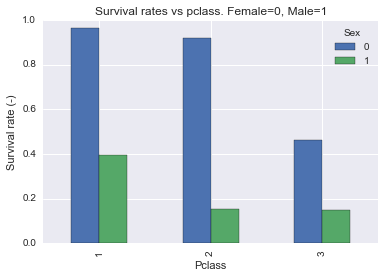

In [100]:
class_gender.unstack().plot.bar()
plt.title('Survival rates vs pclass. Female=0, Male=1')
plt.ylabel('Survival rate (-)')

Incredible! Overall, women had a 75.3% survival rate compared to only 20.5% in men. That is a huge difference! Looking more closely on the different pclasses, we see large variations from class to class. Almost all women in first class survived, with an astonishing survival rate of 96.4%. Women's survival rate in the second class was extremely good as well, at 91.9%. Slightly lower that the class above. In contrast, third class women did not experience the same level of survival. The drop is large, and only 46.1% survived, indicating the great importance of which pclass people belonged to.

The men in the finest class had a survival rate at 39.6%. This is twice as good as the overall survival rate for men, and two and a half times as good than men in second and third class, 15.2% and 15.0% respectively. For men, only first class indicates that it had any effect. Men in classes 2 and 3 experience similar fates.

## Fare

In [71]:
fares_survivors = df[df['Survived'] == 1]['Fare']
fares_dead = df[df['Survived'] == 0]['Fare']

print fares_survivors.describe()
print fares_dead.describe()

count    288.000000
mean      51.647672
std       70.664499
min        0.000000
25%       13.000000
50%       26.250000
75%       65.000000
max      512.329200
Name: Fare, dtype: float64
count    424.000000
mean      22.965456
std       31.448825
min        0.000000
25%        7.895800
50%       11.887500
75%       26.550000
max      263.000000
Name: Fare, dtype: float64


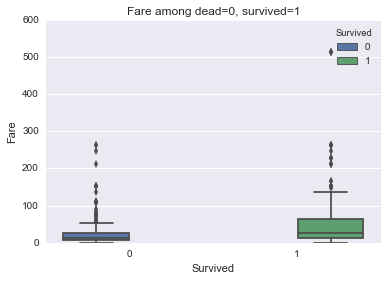

In [72]:
sns.boxplot(x='Survived', y='Fare', data=df, hue='Survived')
plt.title('Fare among dead=0, survived=1')

From the box-plot, we see that the survivors in general had more expensive tickets. However, it is not easy to look at this plot because of the great outlier in the survived group at around 500.

Let us look at the ratio on some of the parameters when we use the describe() method:

In [38]:
(fares_survivors.describe() / fares_dead.describe()).drop(['count', 'std', 'min'])

mean    2.248929
25%     1.646445
50%     2.208202
75%     2.448211
max     1.948020
Name: Fare, dtype: float64

Here we see that the surviving people had in general double the fare ticket.

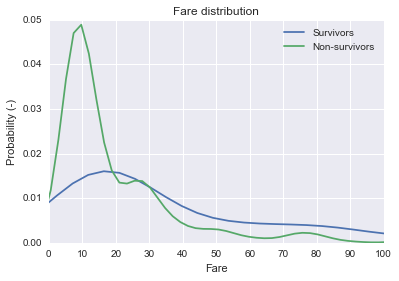

In [39]:
fig = plt.figure()
sns.distplot(fares_survivors, kde=True, hist=False, label='Survivors')
sns.distplot(fares_dead, kde=True, hist=False, label='Non-survivors')
plt.legend(loc=0)
plt.xlim([0, 100]) # Look at the majority of the people
plt.xticks(np.arange(0, 110, 10)) # Create ticks to easier read peak x-values.

plt.title('Fare distribution')
plt.ylabel('Probability (-)')

From the plot above, we see a great difference in the probability distribution for the two groups. What stands out is the great peak at a fare of around 10 for the non-survivors. This indicates that ticket fare had a great impact on the survival rate. 

### Survival rates
We will try to calculate the survival the different age groups. To get a good overview, we will bin the fares in prices of 50. This will give us a good understanding of how survival rate differs in the different fare groups.

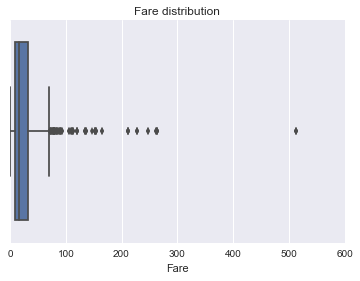

In [40]:
# First lets look at fares to see if we have many outliers which will give us bins with NaN values
sns.boxplot(x='Fare', data=df)
plt.title('Fare distribution')

The boxplot shows that we will get many NaN values when binning the fares. The reason is because of the large jump in fares at some prices. We see a huge jump in fare price from around 270-280 to above 500. We will therefore remove the NaN values when grouping survival rate for the different fare bins. This will give us some jumps from some bins to others when plotting.

In [41]:
binsize = 50
df['Binned_fare'] = pd.cut(df['Fare'], bins=np.arange(0, df['Fare'].max()+binsize, binsize), right=False)
# right=False because we want to know fares as [from, to)

In [42]:
# Grouping the fares and removing NaN bins
fare_group = df.groupby('Binned_fare')['Survived'].mean().dropna()

In [43]:
# Look at the binned fare survival rate data
fare_group

Binned_fare
[0, 50)       0.333333
[50, 100)     0.681818
[100, 150)    0.761905
[150, 200)    0.666667
[200, 250)    0.777778
[250, 300)    0.666667
[500, 550)    1.000000
Name: Survived, dtype: float64

In [44]:
# Percentage of people in the different fare bins
df['Binned_fare'].value_counts() * 100 / df.shape[0]

[0, 50)       80.898876
[50, 100)     12.359551
[100, 150)     2.949438
[200, 250)     1.264045
[150, 200)     1.264045
[250, 300)     0.842697
[500, 550)     0.421348
[450, 500)     0.000000
[400, 450)     0.000000
[350, 400)     0.000000
[300, 350)     0.000000
dtype: float64

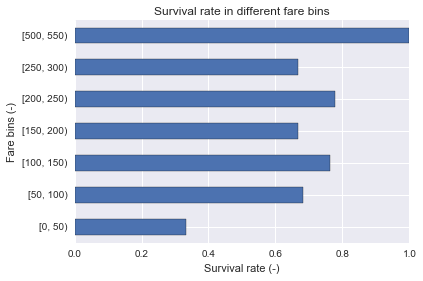

In [101]:
fare_group.plot.barh()
plt.title('Survival rate in different fare bins')
plt.ylabel('Fare bins (-)')
plt.xlabel('Survival rate (-)')

The bar plot illustrates that that the survival rate (33.3%) was lowest for people with low fare tickets, below 50. The other groups, except the highest fare group, had quite similar survival rates, between 66.7% to 77.8%. The highest group (500-550), which consisted of three persons, had a survival rate of 100%. 

# Testing out Machine Learning 

Let us now test out a machine learning algorithm to find out which features were most likely to play part in the survival outcome. I have no experience within machine learning, but have a great wish to learn more about it.

The test and execution is influenced and based on:

- [Random Forest Benchmark at Kaggle](https://www.kaggle.com/benhamner/titanic/random-forest-benchmark-r)
- [NORTHWESTERN UNIVERSITY](http://saenorthwestern.com/Titanic/)
- [DataSchool](http://www.dataschool.io/machine-learning-with-scikit-learn/)

We want to change all non-numerical values to numerical in order to apply machine learning algorithms.

Altering the values like this:

|   Numerical value   | Sex    | Port    |
| ---- | ------ | ----    |
|    0 | Male   | S       |
|    1 | Female | C       |
|    2 |        | Q       |

In [46]:
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2}).astype(int)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Binned_fare
0,0,3,1,22.0,1,0,7.2500,0,"[0, 50)"
1,1,1,0,38.0,1,0,71.2833,1,"[50, 100)"
2,1,3,0,26.0,0,0,7.9250,0,"[0, 50)"
3,1,1,0,35.0,1,0,53.1000,0,"[50, 100)"
4,0,3,1,35.0,0,0,8.0500,0,"[0, 50)"


## Features and target variable

In [47]:
# Feature matrix (X)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]

# Target array (y)
y = df['Survived']

In [48]:
# Check the size of X and y. Important to be correct!
print X.shape
print y.shape

(712, 7)
(712L,)


## Set up training and testing sets

40 % of the data will be used for training. The random_state is set to 10, such that the sets are the same every time.

In [49]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

# Set up test and train data. Set a random_state to have the same testing dat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

In [50]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
166,1,1,40.0,0,0,31.0000,1
410,2,0,34.0,0,0,10.5000,0
647,3,1,39.0,0,0,24.1500,0
83,3,1,38.0,0,0,7.8958,0
688,2,1,24.0,0,0,13.0000,0


## Algorithm: Random Forest Classifier

Have constrained the algorithm to use same random_state, such that the output is similar for every Random Forest run.

In [51]:
from sklearn.ensemble import RandomForestClassifier

def run_random_forest(X_train, X_test, y_train, y_test, n_est):
    """
    Function to test how the number of trees effects the accuracy on this data set.
    """
    rand_forest = RandomForestClassifier(n_estimators=n_est, random_state=10)
    rand_forest.fit(X_train, y_train)
    y_pred = rand_forest.predict(X_test)
    # Accuracy of the model
    return round(metrics.accuracy_score(y_test, y_pred), 6) 

# Number of trees testing set
ntrees = [10, 100, 500, 1000, 5000, 10000]

# Checking the accuracy for different number of trees 
accuracy = [run_random_forest(X_train, X_test, y_train, y_test, n_est=nt) for nt in ntrees]
print accuracy

[0.8, 0.785965, 0.803509, 0.807018, 0.807018, 0.807018]


The result demonstrates a peak value for number of trees between 500-1000 trees. The results are similar to what the guys 
at the [NORTHWESTERN UNIVERSITY](http://saenorthwestern.com/Titanic/). 

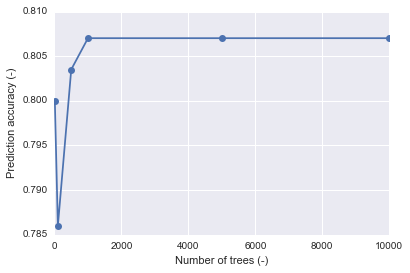

In [52]:
plt.plot(ntrees, accuracy, "-o")
plt.xlabel('Number of trees (-)')
plt.ylabel('Prediction accuracy (-)')

Let use the Random Forest with 500 trees. We want to find out which parameters are most influential 
with respect to survival.

In [53]:
rand_forest = RandomForestClassifier(n_estimators=500, random_state=10)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [54]:
def get_feature_mappings(features):
    """
    Create an integer id for every feature used in the Random Forest calculation.
    """
    out = {}
    for i, f in enumerate(features):
        out[i] = f
    return out       

def connect_feature_to_importance(row, feature_mappings):
    """
    Connect the feature id from Random Forest output to the feature name.
    """
    return feature_mappings[row.name]

In [55]:
# Create the mapping
feature_mapping = get_feature_mappings(X.keys())

feature_mapping

{0: 'Pclass',
 1: 'Sex',
 2: 'Age',
 3: 'SibSp',
 4: 'Parch',
 5: 'Fare',
 6: 'Embarked'}

In [56]:
# Create dataframe with the feature importance results
df_fi = pd.DataFrame({'Importance' : rand_forest.feature_importances_})

# Connect the feature name to importance
df_fi['Feature'] = df_fi.apply(lambda row: connect_feature_to_importance(row, feature_mapping), axis=1)

# Sort the dataframe
df_fi.sort_values(by='Importance', ascending=False, inplace=True)

df_fi

,Importance,Feature
2,0.294387,Age
5,0.258295,Fare
1,0.241297,Sex
0,0.083583,Pclass
3,0.049696,SibSp
4,0.038726,Parch
6,0.034016,Embarked


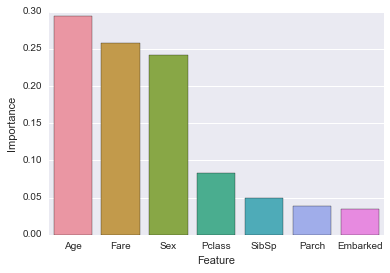

In [57]:
sns.barplot(x='Feature', y='Importance', data=df_fi)
plt.ylabel('Importance')

From above, we notice that the most important parameters from our analysis are: 

- Sex
- Age
- Fare

It is strange that Pclass got such a low importance. Looking at https://www.kaggle.com/c/titanic/forums/t/13390/introducing-kaggle-scripts, Pclass should have had a higher score. However, the reason is explained on http://saenorthwestern.com/Titanic/. In the latter, we see a similar feature importance results. However, after binning the Fare and Age, they get a slightly higher feature importance for the Pclass. 

## Random Forest by class
Let us take a look if different parameters played a part in the different pclasses. 

In [58]:
def random_forest_feature_importance(df):
    # Set up the feature matrix and target variable
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
    X = df[features]
    y = df['Survived']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)
    rand_forest_clf = RandomForestClassifier(n_estimators=100, random_state=10)
    rand_forest_clf.fit(X_train, y_train)
    y_pred = rand_forest_clf.predict(X_test)
    
    return rand_forest_clf.feature_importances_, metrics.accuracy_score(y_test, y_pred)
    

In [59]:
# First class
first_class_feature_importance, accuracy = random_forest_feature_importance(df[df['Pclass'] == 1])
print "First class accuracy: {0:.3f}".format(accuracy)

# Second class
second_class_feature_importance, accuracy = random_forest_feature_importance(df[df['Pclass'] == 2])
print "Second class accuracy: {0:.3f}".format(accuracy)

# Third class
third_class_feature_importance, accuracy = random_forest_feature_importance(df[df['Pclass'] == 3])
print "Third class accuracy: {0:.3f}".format(accuracy)

First class accuracy: 0.738
Second class accuracy: 0.862
Third class accuracy: 0.720


After testing out different parameters, these were chosen at the end:

- test_size (33% of sample)
- random_state (10)
- n_estimators (100)

The predicted accuracy shown in the cell above for each class. Quite interesting findings actually. It is most simple to predict second class passengers when looking on one class at the time.

Let us take a a look which features played a role in the class survival:

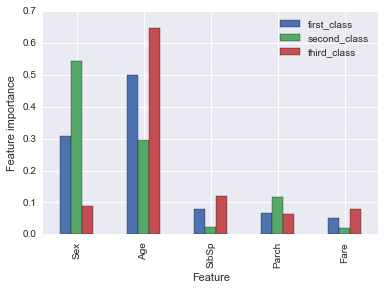

In [60]:
# Create a dataframe with the passanger class feature importances
df_pclass_feature_importances = pd.DataFrame({'first_class' : first_class_feature_importance,
                                             'second_class' : second_class_feature_importance,
                                             'third_class' : third_class_feature_importance})

# Add a column connecting the feature id's to the feature name
df_pclass_feature_importances['Feature'] = \
df_pclass_feature_importances.apply(lambda row: connect_feature_to_importance(row, feature_mapping), axis=1)

# Use feature name as columns
df_pclass_feature_importances.set_index('Feature', inplace=True)

# Since we are looking on feature importance on each pclass, the pclass feature itself is zero
# and can be disregarded.
df_pclass_feature_importances.drop('Pclass', inplace=True)

df_pclass_feature_importances

# Look at
df_pclass_feature_importances.plot.bar()
plt.ylabel('Feature importance')

Very interesting results. When we look on which features are important for each passenger class, we see:

1. Sex is important for 1. and 2. class.
2. Age is very important for 1. and 3. class, and slightly less for 2. class.
3. Fare is not important at all when the passenger classes are analyzed separately.

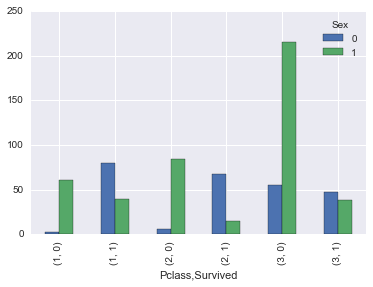

In [61]:
# Survival by Sex in different groups
df.groupby(['Pclass', 'Survived', 'Sex'])['Sex'].count().unstack().plot.bar()

The chart above is a good example why sex is important in pclass 1 and 2, but was not so important in class 3. In both pclass 1 and 2, see that almost none of the women in those classes died. The blue bars are almost not see for the people who died in those classes. However, in pclass 3, we see an almost same amount of women dying and surviving. 

# Conclusion

The Titanic dataset demonstrates interesting findings when investigated. The passengers were spread in different passengers classes with different fare tickets, age was spread from around 0 to 80 years. 64 % of the passengers were men. The overall survival rate of these individuals was found to be around 40 %, meaning that most did not survive. We performed calculations on the survival rate investigating how some variables affected the chance of survival. The variables we looked at were:

- Passenger class (pclass)
- Age
- Gender
- Fare

Firstly, we started out with data from 891 passengers. However, after cleaning the data and removing rows containing NaN values, we were left with 712 people. Thus, our analysis was affected by this and the. Also, not all possible variables were analyzed, such as the number of sibling, parents or children and title. These may have an effect on the survival rates which are found. Also, many other things can have played a role in the survival, such as plain luck, or maybe ethnicity? Some people were near to the life boats when the ship started sinking and consequently had a better survival rate. These are lurking variables which are not taken into account in our analysis.


## Pclass
The data demonstrated a correlation between pclass and survival rate, with survival rates of 65%, 48% and 24% for pclass 1, 2 and 3. A $\chi^2$-test with $\alpha$-level of 0.05 was performed. Calculated p-value was 1.28E-19, giving us enough evidence implying that pclass was important for survival.

## Age
In order to get an easier understanding of the survival rate and age, we binned the age in groups of 10 years. The findings showed similar survival rates for three distinct groups: 
- ~20 % survival rate for age group 60 - 80 years
- ~40 % survival rate for age group 10 - 60 years
- ~60 % survival rate for age group  0 - 10 years.

The data exhibits a correlation between young children and survival.


## Gender
Our analysis shows a correlation between females and a good survival rate. Looking only on gender, 75.2 % of females survived, compared to only 20.5 % seen with the male passengers. However, large fluctuations were seen when looking at gender within the different pclasses. Females in pclass 1 and 2 had a survival rate of 96.4 % and 91.9 %, respectively. On the other hand, females in the lowest class, 3. class, suffered greater losses, with a drop in survival rate to 46.1 %. Male passengers traveling in the finest class experienced a survival rate of 39.6 %, while men in the two other classes survived in small numbers with a survival rate around 15 %.


## Fare

Fare tickets were binned in prices of 50, and a bar plot illustrating the survival rate was created. It shows that passengers in the lowest fare group, 0-50, had the lowest survival rate of 33.3%. A distribution of the non-surviving passengers fare ticket, demonstrates a peak at a fare of 10. The other fare groups had survival rates ranging from 66.7 to 77.8 %. The highest fare group, 500-550, had a survival rate of 100 %. However, the group consisted of only three persons. The majority (80.9 %) of Titanic's passengers belonged to the lowest fare group.


## Ideas for further analysis
If further analyses were to be performed, we would have looked at the entire passenger list to get more correct values. Also, instead of removing NaN-values, we could have imputed missing values. For example, missing age values could have been assigned with the median values. Also, it would have been interesting to perform analyses using machine learning to see if any other insights could have been found.

# References

- http://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
- http://pbpython.com/simple-graphing-pandas.html
- https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html
- http://saenorthwestern.com/Titanic/
- https://www.kaggle.com/c/titanic/forums/t/13390/introducing-kaggle-scripts
- http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- http://trevorstephens.com/kaggle-titanic-tutorial/r-part-3-decision-trees/
- http://www.kdnuggets.com/2016/07/titanic-machine-learning-guide-part-1.html
- http://www.kdnuggets.com/2016/07/titanic-machine-learning-guide-part-2.html
- http://www.kdnuggets.com/2016/07/titanic-machine-learning-guide-part-3.html